In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn
from data_generator import EphysDataset
from models import FullyConnectedFlatten
from train_test_loop import (train_loop, test_loop, cat_numpy)

# set hyperparams
learning_rate = 1e-4
batch_size = 64
epochs = 1

# load data
training_data = EphysDataset(file_path='/home/kyu/chung2017/bin/traces_cached_seg0.raw', num_chan=4, 
                             sampling_frequency=30e3, start_sample=0, end_sample=20*30e3)
test_data = EphysDataset(file_path='/home/kyu/chung2017/bin/traces_cached_seg0.raw', num_chan=4, 
                         sampling_frequency=30e3, start_sample=40*30e3, end_sample=42*30e3)
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

# initialize model
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device('cuda')
model = FullyConnectedFlatten(num_samples_before=training_data.num_samples_before,
                              num_samples_after=training_data.num_samples_after,
                              num_chan=training_data.num_chan).to(device)

# initialize the loss function
loss_fn = nn.L1Loss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

# train and test
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    given, result = test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.539480  [    0/599934]
loss: 0.365546  [ 6400/599934]
loss: 0.281921  [12800/599934]
loss: 0.199271  [19200/599934]
loss: 0.188861  [25600/599934]
loss: 0.155596  [32000/599934]
loss: 0.103089  [38400/599934]
loss: 0.143764  [44800/599934]
loss: 0.131574  [51200/599934]
loss: 0.096077  [57600/599934]
loss: 0.114723  [64000/599934]
loss: 0.079166  [70400/599934]
loss: 0.099151  [76800/599934]
loss: 0.150447  [83200/599934]
loss: 0.156285  [89600/599934]
loss: 0.088912  [96000/599934]
loss: 0.097573  [102400/599934]
loss: 0.094547  [108800/599934]
loss: 0.072415  [115200/599934]
loss: 0.089931  [121600/599934]
loss: 0.266423  [128000/599934]
loss: 0.087045  [134400/599934]
loss: 0.092017  [140800/599934]
loss: 0.062899  [147200/599934]
loss: 0.094213  [153600/599934]
loss: 0.092025  [160000/599934]
loss: 0.076527  [166400/599934]
loss: 0.085132  [172800/599934]
loss: 0.067798  [179200/599934]
loss: 0.059896  [185600/599934]
loss: 0.059469  

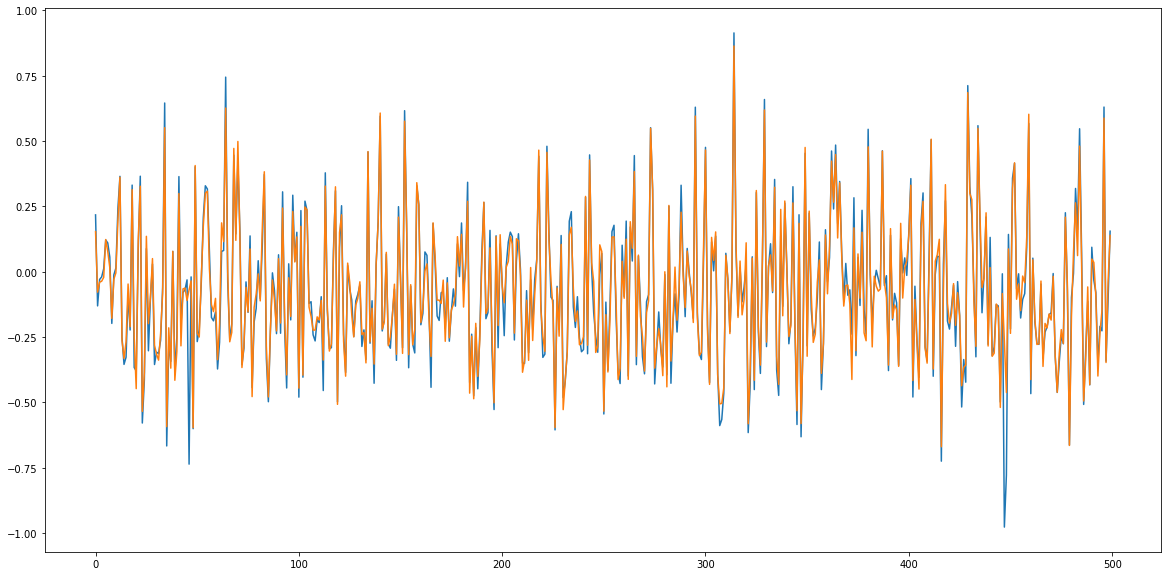

In [3]:
import matplotlib.pyplot as plt

given_numpy, result_numpy = cat_numpy(given, result)
plt.subplots(figsize=(20,10))
plt.plot(given_numpy[1000:1500,3])
plt.plot(result_numpy[1000:1500,3])